# Question2
- 주제1 : UnivClass_Alfredo 알프레도 대학 교실의 working_day(수업 있는날)과 holiday(공휴일, 주말, 방학)의 에너지 상관관계를 찾아보자
- 사용 데이터 : All_buildings_meta_data.csv, weather0.csv

## 데이터 확인

In [146]:
import pandas as pd

meta_data = pd.read_csv("./data/all_buildings_meta_data.csv")
meta_data

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
0,PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
1,UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
2,Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
3,Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
4,PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Office_Lane,30/11/15 23:00,01/12/14 00:00,NaN,Heat network,Education,Heat Network,8.0,NaN,Office,NaN,34455.2439,3201.000000,College/University,Europe/London,1907,Lane,Office,weather5.csv
503,Office_Cameron,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0000,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv
504,UnivLab_Lea,30/11/15 23:00,01/12/14 00:00,NaN,Gas,Education,Gas,6.0,NaN,College Laboratory,NaN,16802.4479,1561.000000,College/University,Europe/London,1995,Lea,UnivLab,weather5.csv
505,UnivLab_Carlos,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,30143.0000,2800.375129,College/University,America/New_York,1951,Carlos,UnivLab,weather2.csv


해당 데이터 중 UnivClass_Alfredo의 날씨 데이터 명 확인 -> weather0.csv 사용

In [147]:
meta_data[meta_data["uid"] == "UnivClass_Alfredo"]

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
346,UnivClass_Alfredo,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,90903.0,8445.161409,College/University,America/Phoenix,NaN,Alfredo,UnivClass,weather0.csv


weather0.csv 데이터 확인

In [148]:
weather = pd.read_csv("./data/weather0.csv")
weather

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC<br />,timestamp.1
0,2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01 07:51:00<br />,2015-01-01 00:51:00
1,2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,-,NaN,NaN,Mostly Cloudy,300,2015-01-01 08:47:00<br />,2015-01-01 01:47:00
2,2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01 08:51:00<br />,2015-01-01 01:51:00
3,2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01 09:51:00<br />,2015-01-01 02:51:00
4,2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01 10:51:00<br />,2015-01-01 03:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,NaN,NaN,Clear,280,2016-01-01 02:51:00<br />,2015-12-31 19:51:00
8995,2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,NaN,NaN,Partly Cloudy,270,2016-01-01 03:51:00<br />,2015-12-31 20:51:00
8996,2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,NaN,NaN,Clear,260,2016-01-01 04:51:00<br />,2015-12-31 21:51:00
8997,2015-12-31 22:51:00,10:51 PM,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0,2016-01-01 05:51:00<br />,2015-12-31 22:51:00


UnivClass_Alfredo.csv 데이터 확인

In [149]:
energy = pd.read_csv("./data/UnivClass_Alfredo.csv")
energy

,timestamp,UnivClass_Alfredo
0,2015-01-01 00:00:00,204.2500
1,2015-01-01 01:00:00,202.6150
2,2015-01-01 02:00:00,198.5525
3,2015-01-01 03:00:00,198.5050
4,2015-01-01 04:00:00,201.8350
...,...,...
8755,2015-12-31 19:00:00,177.0500
8756,2015-12-31 20:00:00,177.0300
8757,2015-12-31 21:00:00,166.7425
8758,2015-12-31 22:00:00,177.5900


## 데이터 처리

In [150]:
# 원본 데이터에 영향을 주지 않기 위해 복사본 데이터를 명시적으로 표시
time_weather = weather.copy()
time_weather

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC<br />,timestamp.1
0,2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01 07:51:00<br />,2015-01-01 00:51:00
1,2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,-,NaN,NaN,Mostly Cloudy,300,2015-01-01 08:47:00<br />,2015-01-01 01:47:00
2,2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01 08:51:00<br />,2015-01-01 01:51:00
3,2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01 09:51:00<br />,2015-01-01 02:51:00
4,2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01 10:51:00<br />,2015-01-01 03:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,NaN,NaN,Clear,280,2016-01-01 02:51:00<br />,2015-12-31 19:51:00
8995,2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,NaN,NaN,Partly Cloudy,270,2016-01-01 03:51:00<br />,2015-12-31 20:51:00
8996,2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,NaN,NaN,Clear,260,2016-01-01 04:51:00<br />,2015-12-31 21:51:00
8997,2015-12-31 22:51:00,10:51 PM,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0,2016-01-01 05:51:00<br />,2015-12-31 22:51:00


energy 데이터의 경우 시간당 에너지로 기록되어 있음.
하지만 weather 데이터의 경우 대부분 시간당 기록되어 있지만 일부 한 시간 동안 두번 측정된데이터가 존재
우리는 시간당 에너지의 변화가 알고 싶기 때문에 weather 데이터 중 한시간 동안 두번 측정된 데이터를 하나 값만 남김

In [151]:
time_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              8999 non-null   object 
 1   TimeMST                8999 non-null   object 
 2   TemperatureC           8999 non-null   float64
 3   Dew PointC             8999 non-null   float64
 4   Humidity               8990 non-null   float64
 5   Sea Level PressurehPa  8999 non-null   float64
 6   VisibilityKm           8999 non-null   float64
 7   Wind Direction         8999 non-null   object 
 8   Wind SpeedKm/h         8999 non-null   object 
 9   Gust SpeedKm/h         8999 non-null   object 
 10  Precipitationmm        443 non-null    float64
 11  Events                 330 non-null    object 
 12  Conditions             8999 non-null   object 
 13  WindDirDegrees         8999 non-null   int64  
 14  DateUTC<br />          8999 non-null   object 
 15  time

시간 단위 데이터 처리가 편하도록 timestamp를 datatime으로 처리

In [152]:
time_weather['timestamp'] = pd.to_datetime(time_weather['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
time_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              8999 non-null   datetime64[ns]
 1   TimeMST                8999 non-null   object        
 2   TemperatureC           8999 non-null   float64       
 3   Dew PointC             8999 non-null   float64       
 4   Humidity               8990 non-null   float64       
 5   Sea Level PressurehPa  8999 non-null   float64       
 6   VisibilityKm           8999 non-null   float64       
 7   Wind Direction         8999 non-null   object        
 8   Wind SpeedKm/h         8999 non-null   object        
 9   Gust SpeedKm/h         8999 non-null   object        
 10  Precipitationmm        443 non-null    float64       
 11  Events                 330 non-null    object        
 12  Conditions             8999 non-null   object        
 13  Win

년, 월, 일, 시간 컬럼 생성

In [153]:
dt = pd.DatetimeIndex(time_weather["timestamp"])
time_weather["date"] = dt.date
time_weather["year"] = dt.year
time_weather["month"] = dt.month
time_weather["day"] = dt.day
time_weather["hour"] = dt.hour
time_weather["dayofweek"] = dt.dayofweek

In [154]:
time_weather

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,...,Conditions,WindDirDegrees,DateUTC<br />,timestamp.1,date,year,month,day,hour,dayofweek
0,2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,...,Mostly Cloudy,300,2015-01-01 07:51:00<br />,2015-01-01 00:51:00,2015-01-01,2015,1,1,0,3
1,2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,-,...,Mostly Cloudy,300,2015-01-01 08:47:00<br />,2015-01-01 01:47:00,2015-01-01,2015,1,1,1,3
2,2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,...,Mostly Cloudy,300,2015-01-01 08:51:00<br />,2015-01-01 01:51:00,2015-01-01,2015,1,1,1,3
3,2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,...,Scattered Clouds,320,2015-01-01 09:51:00<br />,2015-01-01 02:51:00,2015-01-01,2015,1,1,2,3
4,2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,...,Partly Cloudy,60,2015-01-01 10:51:00<br />,2015-01-01 03:51:00,2015-01-01,2015,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,...,Clear,280,2016-01-01 02:51:00<br />,2015-12-31 19:51:00,2015-12-31,2015,12,31,19,3
8995,2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,...,Partly Cloudy,270,2016-01-01 03:51:00<br />,2015-12-31 20:51:00,2015-12-31,2015,12,31,20,3
8996,2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,...,Clear,260,2016-01-01 04:51:00<br />,2015-12-31 21:51:00,2015-12-31,2015,12,31,21,3
8997,2015-12-31 22:51:00,10:51 PM,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,...,Clear,0,2016-01-01 05:51:00<br />,2015-12-31 22:51:00,2015-12-31,2015,12,31,22,3


한 시간 동안 두번 이상 측정 된 데이터 하나만 남기고 삭제

In [155]:
time_weather[time_weather.duplicated(["date", "hour"], keep=False)]

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,...,Conditions,WindDirDegrees,DateUTC<br />,timestamp.1,date,year,month,day,hour,dayofweek
1,2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,-,...,Mostly Cloudy,300,2015-01-01 08:47:00<br />,2015-01-01 01:47:00,2015-01-01,2015,1,1,1,3
2,2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,...,Mostly Cloudy,300,2015-01-01 08:51:00<br />,2015-01-01 01:51:00,2015-01-01,2015,1,1,1,3
12,2015-01-01 11:21:00,11:21 AM,5.6,-1.7,60.0,1020.5,16.1,Variable,5.6,-,...,Mostly Cloudy,0,2015-01-01 18:21:00<br />,2015-01-01 11:21:00,2015-01-01,2015,1,1,11,3
13,2015-01-01 11:51:00,11:51 AM,5.6,-1.7,60.0,1020.5,16.1,Variable,7.4,-,...,Mostly Cloudy,0,2015-01-01 18:51:00<br />,2015-01-01 11:51:00,2015-01-01,2015,1,1,11,3
14,2015-01-01 12:04:00,12:04 PM,5.6,-2.2,58.0,1020.2,16.1,North,11.1,-,...,Mostly Cloudy,360,2015-01-01 19:04:00<br />,2015-01-01 12:04:00,2015-01-01,2015,1,1,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,2015-12-14 09:17:00,9:17 AM,7.2,5.0,86.0,1009.4,6.4,NW,11.1,-,...,Rain,320,2015-12-14 16:17:00<br />,2015-12-14 09:17:00,2015-12-14,2015,12,14,9,0
8574,2015-12-14 09:32:00,9:32 AM,7.2,5.0,86.0,1009.4,8.0,NNW,13.0,-,...,Light Rain,340,2015-12-14 16:32:00<br />,2015-12-14 09:32:00,2015-12-14,2015,12,14,9,0
8575,2015-12-14 09:51:00,9:51 AM,7.2,5.0,86.0,1009.4,14.5,Variable,7.4,-,...,Light Rain,0,2015-12-14 16:51:00<br />,2015-12-14 09:51:00,2015-12-14,2015,12,14,9,0
8865,2015-12-26 11:33:00,11:33 AM,11.1,-11.1,20.0,1016.1,16.1,NNE,29.6,44.4,...,Scattered Clouds,30,2015-12-26 18:33:00<br />,2015-12-26 11:33:00,2015-12-26,2015,12,26,11,5


In [156]:
# 삭제
time_weather = time_weather.drop_duplicates(["date", "hour"], keep="last")

In [157]:
# 확인
time_weather[time_weather.duplicated(["date", "hour"], keep=False)]

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,...,Conditions,WindDirDegrees,DateUTC<br />,timestamp.1,date,year,month,day,hour,dayofweek


time_weather과 energy 데이터를 결합하기위해 energy data도 날짜와 시간 컬럼 만들어주자

In [158]:
energy

,timestamp,UnivClass_Alfredo
0,2015-01-01 00:00:00,204.2500
1,2015-01-01 01:00:00,202.6150
2,2015-01-01 02:00:00,198.5525
3,2015-01-01 03:00:00,198.5050
4,2015-01-01 04:00:00,201.8350
...,...,...
8755,2015-12-31 19:00:00,177.0500
8756,2015-12-31 20:00:00,177.0300
8757,2015-12-31 21:00:00,166.7425
8758,2015-12-31 22:00:00,177.5900


In [159]:
energy['timestamp'] = pd.to_datetime(energy['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dt = pd.DatetimeIndex(energy["timestamp"])
energy["date"] = dt.date
energy["hour"] = dt.hour
energy = energy.drop("timestamp", axis=1)
energy

,UnivClass_Alfredo,date,hour
0,204.2500,2015-01-01,0
1,202.6150,2015-01-01,1
2,198.5525,2015-01-01,2
3,198.5050,2015-01-01,3
4,201.8350,2015-01-01,4
...,...,...,...
8755,177.0500,2015-12-31,19
8756,177.0300,2015-12-31,20
8757,166.7425,2015-12-31,21
8758,177.5900,2015-12-31,22


time_weather, energy 데이터프레임 결합

In [160]:
df = pd.merge(time_weather, energy, how="inner", on=["date", "hour"])
df

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,...,WindDirDegrees,DateUTC<br />,timestamp.1,date,year,month,day,hour,dayofweek,UnivClass_Alfredo
0,2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,...,300,2015-01-01 07:51:00<br />,2015-01-01 00:51:00,2015-01-01,2015,1,1,0,3,204.2500
1,2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,...,300,2015-01-01 08:51:00<br />,2015-01-01 01:51:00,2015-01-01,2015,1,1,1,3,202.6150
2,2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,...,320,2015-01-01 09:51:00<br />,2015-01-01 02:51:00,2015-01-01,2015,1,1,2,3,198.5525
3,2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,...,60,2015-01-01 10:51:00<br />,2015-01-01 03:51:00,2015-01-01,2015,1,1,3,3,198.5050
4,2015-01-01 04:51:00,4:51 AM,2.2,-1.1,79.0,1017.9,16.1,ENE,5.6,-,...,70,2015-01-01 11:51:00<br />,2015-01-01 04:51:00,2015-01-01,2015,1,1,4,3,201.8350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,...,280,2016-01-01 02:51:00<br />,2015-12-31 19:51:00,2015-12-31,2015,12,31,19,3,177.0500
8736,2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,...,270,2016-01-01 03:51:00<br />,2015-12-31 20:51:00,2015-12-31,2015,12,31,20,3,177.0300
8737,2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,...,260,2016-01-01 04:51:00<br />,2015-12-31 21:51:00,2015-12-31,2015,12,31,21,3,166.7425
8738,2015-12-31 22:51:00,10:51 PM,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,...,0,2016-01-01 05:51:00<br />,2015-12-31 22:51:00,2015-12-31,2015,12,31,22,3,177.5900


보기 편하도록 안쓰는 컬럼 제거

In [161]:
drop_cols = ['timestamp', 'TimeMST', 'DateUTC<br />', 'timestamp.1']
df = df.drop(drop_cols, axis=1)
df

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Alfredo
0,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,0,3,204.2500
1,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,1,3,202.6150
2,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01,2015,1,1,2,3,198.5525
3,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01,2015,1,1,3,3,198.5050
4,2.2,-1.1,79.0,1017.9,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,70,2015-01-01,2015,1,1,4,3,201.8350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,NaN,NaN,Clear,280,2015-12-31,2015,12,31,19,3,177.0500
8736,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,NaN,NaN,Partly Cloudy,270,2015-12-31,2015,12,31,20,3,177.0300
8737,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,NaN,NaN,Clear,260,2015-12-31,2015,12,31,21,3,166.7425
8738,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0,2015-12-31,2015,12,31,22,3,177.5900


woriking_day, holiday 컬럼을 만들기
일단 토요일(5), 일요일(6) -> holiday

In [162]:
df.loc[df["dayofweek"] == 5, "holiday"] = 1
df.loc[df["dayofweek"] == 6, "holiday"] = 1
df

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Alfredo,holiday
0,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,0,3,204.2500,NaN
1,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,1,3,202.6150,NaN
2,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01,2015,1,1,2,3,198.5525,NaN
3,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01,2015,1,1,3,3,198.5050,NaN
4,2.2,-1.1,79.0,1017.9,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,70,2015-01-01,2015,1,1,4,3,201.8350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,NaN,NaN,Clear,280,2015-12-31,2015,12,31,19,3,177.0500,NaN
8736,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,NaN,NaN,Partly Cloudy,270,2015-12-31,2015,12,31,20,3,177.0300,NaN
8737,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,NaN,NaN,Clear,260,2015-12-31,2015,12,31,21,3,166.7425,NaN
8738,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0,2015-12-31,2015,12,31,22,3,177.5900,NaN


1월 1일 New Year’s Day
1월 19일 Martin Luther King’s Day
2월 16일 President’s Birthday 2월 셋째 월요일
5월 25일 Memorial Day 5월 마지막 월요일
7월 3일 Independence Day
9월 7일 Labor Day 9월 첫째 월요일
10월 12일 Columbus Day 10월 둘째 월요일
11월 11일 Veterans Day
11월 26일 Thanksgiving Day 11월 넷째 목요일
12월 25일 Christmas Day

2015년 미국 공휴일 -> 공휴일로 처리
date의 경우 date type이라서 문자열로 변경하는 과정이 필요

In [163]:
df = df.astype({"date": "str"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8740 entries, 0 to 8739
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TemperatureC           8740 non-null   float64
 1   Dew PointC             8740 non-null   float64
 2   Humidity               8733 non-null   float64
 3   Sea Level PressurehPa  8740 non-null   float64
 4   VisibilityKm           8740 non-null   float64
 5   Wind Direction         8740 non-null   object 
 6   Wind SpeedKm/h         8740 non-null   object 
 7   Gust SpeedKm/h         8740 non-null   object 
 8   Precipitationmm        310 non-null    float64
 9   Events                 182 non-null    object 
 10  Conditions             8740 non-null   object 
 11  WindDirDegrees         8740 non-null   int64  
 12  date                   8740 non-null   object 
 13  year                   8740 non-null   int64  
 14  month                  8740 non-null   int64  
 15  day 

In [164]:
holiday_lst = ["2015-01-01", "2015-01-19", "2015-02-16", "2015-05-25", "2015-07-03", "2015-09-07", "2015-10-12", "2015-11-11", "2015-11-26", "2015-12-25"]

for i in holiday_lst:
    df.loc[df["date"] == i, "holiday"] = 1
df[df["date"] == "2015-12-25"]

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Alfredo,holiday
8572,11.1,7.2,77.0,1010.3,16.1,East,11.1,-,NaN,NaN,Scattered Clouds,90,2015-12-25,2015,12,25,0,4,152.02,1.0
8573,10.6,7.2,80.0,1009.9,16.1,East,13.0,-,NaN,NaN,Partly Cloudy,100,2015-12-25,2015,12,25,1,4,147.66,1.0
8574,10.0,6.7,80.0,1010.0,12.9,East,13.0,-,NaN,NaN,Scattered Clouds,80,2015-12-25,2015,12,25,2,4,154.74,1.0
8575,10.0,6.7,80.0,1010.4,16.1,East,9.3,-,NaN,NaN,Scattered Clouds,100,2015-12-25,2015,12,25,3,4,155.40,1.0
8576,8.3,6.1,86.0,1010.6,9.7,WSW,5.6,-,NaN,NaN,Partly Cloudy,250,2015-12-25,2015,12,25,4,4,153.52,1.0
8577,8.9,6.1,83.0,1011.1,9.7,Calm,Calm,-,NaN,NaN,Haze,0,2015-12-25,2015,12,25,5,4,152.89,1.0
8578,8.3,6.1,86.0,1011.7,11.3,East,5.6,-,NaN,NaN,Scattered Clouds,100,2015-12-25,2015,12,25,6,4,153.01,1.0
8579,9.4,6.1,80.0,1012.6,14.5,WSW,5.6,-,NaN,NaN,Scattered Clouds,250,2015-12-25,2015,12,25,7,4,149.85,1.0
8580,10.6,5.0,68.0,1013.9,16.1,West,18.5,-,NaN,NaN,Partly Cloudy,270,2015-12-25,2015,12,25,8,4,143.24,1.0
8581,12.2,2.8,53.0,1015.2,16.1,West,14.8,-,NaN,NaN,Scattered Clouds,260,2015-12-25,2015,12,25,9,4,140.62,1.0


공휴일 아닌 날은 holiday = 0 으로

In [165]:
df["holiday"] = df["holiday"].fillna(0)
df.isnull().sum()

TemperatureC                0
Dew PointC                  0
Humidity                    7
Sea Level PressurehPa       0
VisibilityKm                0
Wind Direction              0
Wind SpeedKm/h              0
Gust SpeedKm/h              0
Precipitationmm          8430
Events                   8558
Conditions                  0
WindDirDegrees              0
date                        0
year                        0
month                       0
day                         0
hour                        0
dayofweek                   0
UnivClass_Alfredo           0
holiday                     0
dtype: int64

In [166]:
df.groupby(["holiday", "month"]).mean()

TemperatureC  Dew PointC   Humidity  Sea Level PressurehPa  \
holiday month                                                               
0.0     1         15.105417    3.483958  51.318750            1018.359583   
        2         18.321272    2.727851  40.425439            1015.128289   
        3         21.960606    1.044508  31.613636            1013.593750   
        4         23.996964   -3.207590  19.362429            1009.997913   
        5         26.179375    2.913750  25.966667            1008.537083   
        6         34.807088    6.459962  21.367816            1006.452682   
        7         35.055682   12.482765  27.602273            1008.280871   
        8        -23.967063  -45.037698  30.860279            1008.131151   
        9        -48.358449  -64.876143  39.649299            1008.560437   
        10        25.631325   10.909639  43.744980            1010.245582   
        11        16.307473    1.140879  39.723077            1013.348352   
        12        12.014773   -1.251894  44.573864            1015.030492   
1.0     1         13.436364    1.363636  49.893939            1018.846970   
        2         18.916667    6.326389  47.282407            1013.015741   
        3         23.511111    0.783796  26.796296            1014.335185   
        4         23.264583   -1.517708  24.208333            1008.875521   
        5         26.267045    3.216288  26.340909            1009.875379   
        6         34.628421    6.935263  21.515789            1006.306842   
        7         34.074884   11.584186  29.990698            1009.120930   
        8         35.844583   15.847083  33.270833            1007.575833   
        9         33.358796   13.377778  31.685185            1007.903241   
        10        27.071008    9.978992  37.138655            1009.942017   
        11        16.750758    0.111742  36.170455            1014.889773   
        12        11.776852   -2.876852  41.277778            1016.490741   

               VisibilityKm  Precipitationmm  WindDirDegrees    year  \
holiday month                                                          
0.0     1         15.740625         0.016667      103.583333  2015.0   
        2         16.096491         0.001250      112.631579  2015.0   
        3         16.007008         0.015000      134.488636  2015.0   
        4         16.093928         0.004000      155.540797  2015.0   
        5         16.032917         0.041111      174.791667  2015.0   
        6         16.093870         0.007619      174.386973  2015.0   
        7         16.038826         0.072500      176.553030  2015.0   
        8        -43.603175         0.043500      158.353175  2015.0   
        9        -63.552485         0.028421      136.600398  2015.0   
        10        16.070884         0.010811      121.967871  2015.0   
        11        16.078901         0.003333      142.065934  2015.0   
        12        16.060417         0.025714      110.719697  2015.0   
1.0     1         16.081818         0.006667       95.909091  2015.0   
        2         15.598611         0.000000      116.481481  2015.0   
        3         16.100000              NaN      121.157407  2015.0   
        4         16.100000         0.017778      159.635417  2015.0   
        5         16.100000         0.000000      149.886364  2015.0   
        6        -36.644737         0.006667      163.315789  2015.0   
        7         16.047442         0.018571      190.186047  2015.0   
        8         16.046250         0.032500      153.750000  2015.0   
        9         16.100000         0.054000      135.972222  2015.0   
        10        16.100000         0.032727      108.193277  2015.0   
        11        15.996970         0.015455      113.674242  2015.0   
        12        15.996296         0.006000      140.462963  2015.0   

                     day       hour  dayofweek  UnivClass_Alfredo  
holiday month                                                      
0.0

In [167]:
df

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Alfredo,holiday
0,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,0,3,204.2500,1.0
1,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,1,3,202.6150,1.0
2,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01,2015,1,1,2,3,198.5525,1.0
3,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01,2015,1,1,3,3,198.5050,1.0
4,2.2,-1.1,79.0,1017.9,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,70,2015-01-01,2015,1,1,4,3,201.8350,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,12.2,-6.1,28.0,1016.6,16.1,West,11.1,-,NaN,NaN,Clear,280,2015-12-31,2015,12,31,19,3,177.0500,0.0
8736,11.7,-6.7,27.0,1017.0,16.1,West,11.1,-,NaN,NaN,Partly Cloudy,270,2015-12-31,2015,12,31,20,3,177.0300,0.0
8737,10.0,-6.7,31.0,1017.2,16.1,West,5.6,-,NaN,NaN,Clear,260,2015-12-31,2015,12,31,21,3,166.7425,0.0
8738,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0,2015-12-31,2015,12,31,22,3,177.5900,0.0


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(["seaborn-white"])

In [194]:
# 월 기준으로 에너지 평균 값 시각화
def month_holiday(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))

    df_plot = dataframe.groupby(["holiday", "month"]).mean().reset_index()

    g1 = sns.barplot(data=df_plot.query("holiday == 0"), ax=ax[0], x=time, y="UnivClass_Alfredo")
    for p in g1.patches:
        g1.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')


    g2 = sns.barplot(data=df_plot.query("holiday == 1"), ax=ax[1], x=time, y="UnivClass_Alfredo")
    for p in g2.patches:
        g2.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    ax[0].set_title("working")
    ax[1].set_title("holiday")
    plt.show()

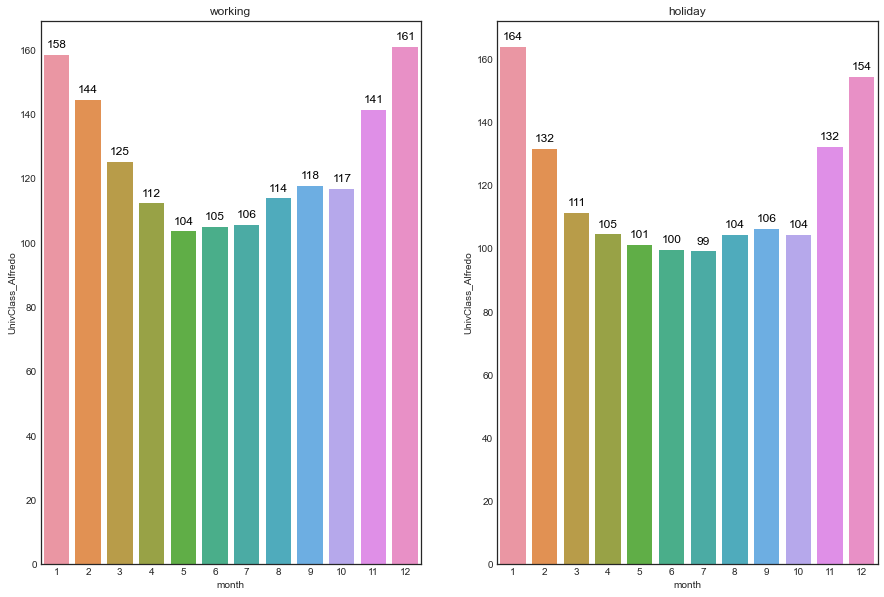

In [195]:
month_holiday("month", df)

공휴일보다 일하는 날이 전체적으로 좀더 많은 에너지를 사용하고 있지만 만족스러운 차이가 아님
boxplot을 활용하여 원인 분석

<AxesSubplot:xlabel='month', ylabel='UnivClass_Alfredo'>

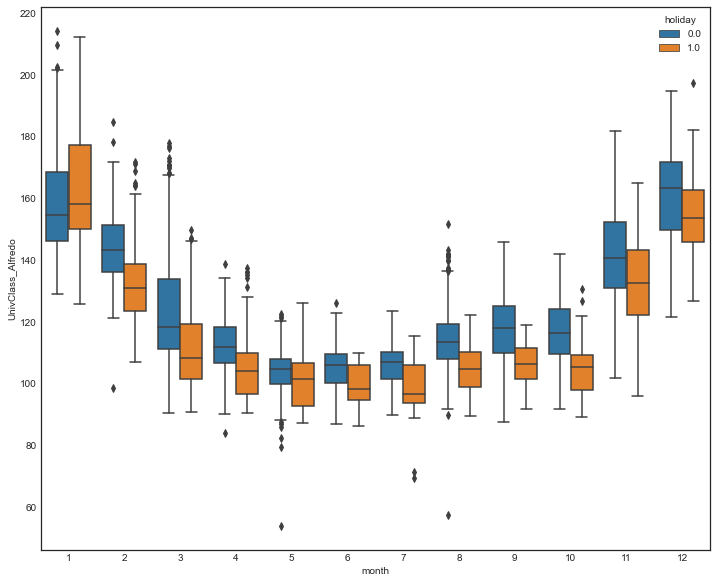

In [186]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x="month", y="UnivClass_Alfredo", hue="holiday")

에너지 사용량이 같은 달이라 할지라도 데이터가 전체적으로 분산되어있어 working_day와 holiday의 월별 평균치를 비교했을 때 눈에 띄는 결과를 볼 수 없음
대체로 working_day의 에너지 사용량이 많았지만 1월 경의 holiday의 에너지 사용량이 더 많은 것을 확인
이 원인을 찾기위해 1월 한달 간의 일별 에너지 사용량을 비교해보자

In [189]:
df_jan = df[df["month"] == 1].copy()
df_jan

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Alfredo,holiday
0,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,0,3,204.2500,1.0
1,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,1,3,202.6150,1.0
2,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01,2015,1,1,2,3,198.5525,1.0
3,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01,2015,1,1,3,3,198.5050,1.0
4,2.2,-1.1,79.0,1017.9,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,70,2015-01-01,2015,1,1,4,3,201.8350,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,13.9,11.7,87.0,1012.1,16.1,Calm,Calm,-,NaN,NaN,Mostly Cloudy,0,2015-01-31,2015,1,31,19,5,149.1700,1.0
740,13.3,11.7,90.0,1012.4,16.1,ENE,5.6,-,NaN,NaN,Overcast,70,2015-01-31,2015,1,31,20,5,152.5600,1.0
741,12.8,11.1,89.0,1012.9,16.1,Calm,Calm,-,NaN,NaN,Mostly Cloudy,0,2015-01-31,2015,1,31,21,5,152.2900,1.0
742,12.2,11.1,93.0,1013.1,16.1,Calm,Calm,-,NaN,NaN,Mostly Cloudy,0,2015-01-31,2015,1,31,22,5,156.1800,1.0


In [206]:
# 일 기준으로 working, holiday 에너지 총합 비교
def hour_holiday(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(20, 15))

    df_plot = dataframe.groupby(["holiday", "day"]).sum().reset_index()

    g1 = sns.barplot(data=df_plot.query("holiday == 0"), ax=ax[0], x=time, y="UnivClass_Alfredo")
    for p in g1.patches:
        g1.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')


    g2 = sns.barplot(data=df_plot.query("holiday == 1"), ax=ax[1], x=time, y="UnivClass_Alfredo")
    for p in g2.patches:
        g2.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    ax[0].set_title("working")
    ax[1].set_title("holiday")
    plt.show()

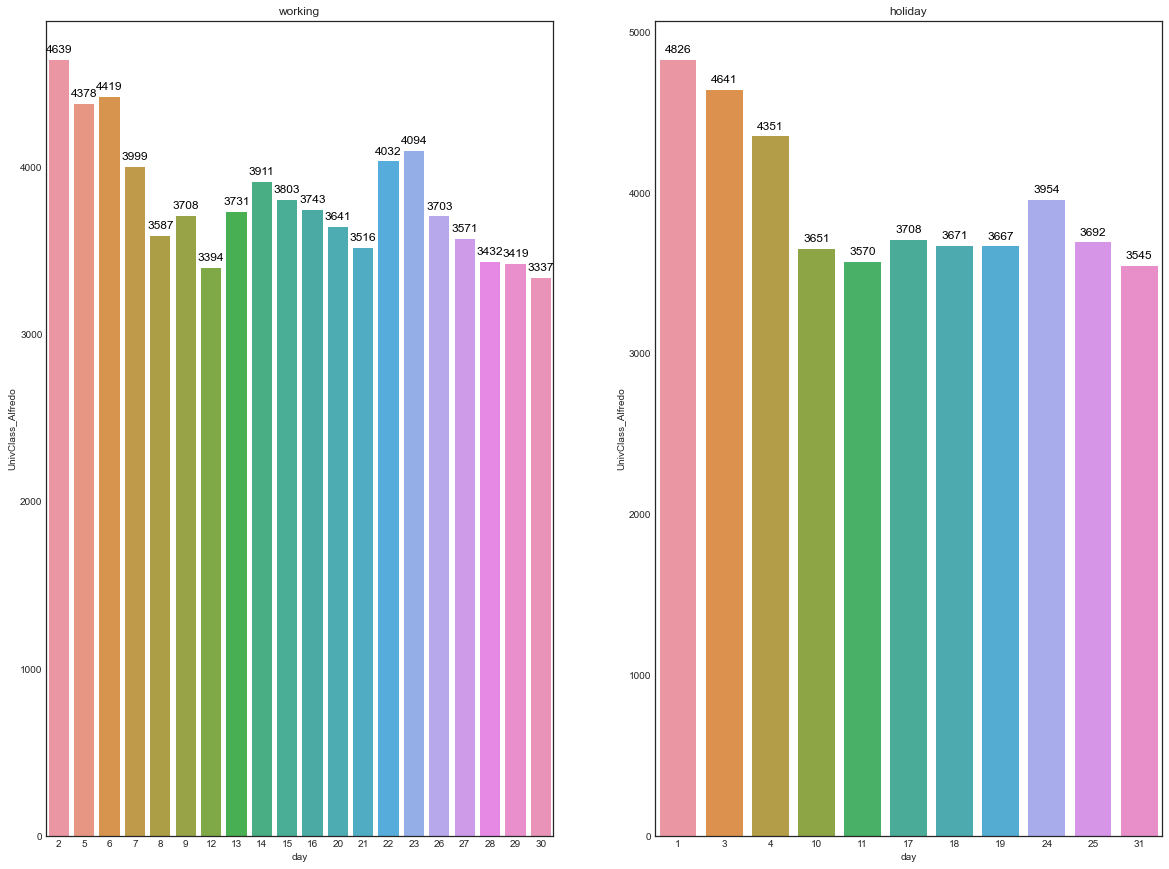

In [207]:
hour_holiday("day", df_jan)

위의 그래프를 보았을 때 1월 1일~6일까지의 에너지 총 사용량이 높은 것을 확인할 수 있지만, 에너지 사용량이 working_day와 holiday의 구분 없다.
즉, 1월의 holiday가 working_day보다 평균 에너지 사용량이 높았던 것은 통계적 오류일 뿐,
alfred univ의 경우 woriking_day, holiday 구분 없이 사용하고 있다.

그러면 다시 데이터로 돌아가서 가장 에너지를 많이 사용한 일을 찾아서 그 날 하루동안의 에너지의 변화를 알아보자
가장 에너지를 많이 사용한 날을 찾기

In [211]:
df_max = df.groupby(["month", "day"]).sum().copy()
df_max

TemperatureC  Dew PointC  Humidity  Sea Level PressurehPa  \
month day                                                              
1     1           104.5       -35.0    1629.0                24453.1   
      2           129.2       -74.3    1406.0                24422.3   
      3           157.9       -47.3    1377.0                24553.3   
      4           233.6        -9.9    1286.0                24642.2   
      5           326.6         0.7    1073.0                24585.0   
...                 ...         ...       ...                    ...   
12    27          205.5      -240.7     662.0                24482.6   
      28          207.6       -93.7    1020.0                24273.8   
      29          212.8       -60.1    1096.0                24329.6   
      30          200.5       -99.9    1058.0                24500.1   
      31          216.7      -120.4     959.0                24430.3   

           VisibilityKm  Precipitationmm  WindDirDegrees   year  hour  \
month day                                                               
1     1           386.4              0.0            4120  48360   276   
      2           386.4              0.0            3490  48360   276   
      3           386.4              0.0            2120  48360   276   
      4           386.4              0.0            1750  48360   276   
      5           386.4              0.0            1040  48360   276   
...                 ...              ...             ...    ...   ...   
12    27          386.4              0.0            2570  48360   276   
      28          386.4              0.0            2060  48360   276   
      29          386.4              0.0            3410  48360   276   
      30          386.4              0.0            3010  48360   276   
      31          386.4              0.0            3480  48360   276   

           dayofweek  UnivClass_Alfredo  holiday  
month day                                         
1     1           72          4826.4775     24.0  
      2           96          4639.3875      0.0  
      3          120          4640.8900     24.0  
      4          144          4351.0475     24.0  
      5            0          4377.5150      0.0  
...              ...                ...      ...  
12    27         144          3830.7600     24.0  
      28           0          3861.5700      0.0  
      29          24          4023.7300      0.0  
      30          48          4206.7100      0.0  
      31          72          4240.8325      0.0  

[365 rows x 12 columns]

In [214]:
max_energy = df_max["UnivClass_Alfredo"].max()
df_max[df_max["UnivClass_Alfredo"] == max_energy]

,,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Precipitationmm,WindDirDegrees,year,hour,dayofweek,UnivClass_Alfredo,holiday
month,day,,,,,,,,,,,,
1,1,104.5,-35.0,1629.0,24453.1,386.4,0.0,4120,48360,276,72,4826.4775,24.0


1월 1일이 1년 중 가장 많은 에너지를 사용한 날
1월 1일의 에너지 추이를 그래프로 확인해보자

In [216]:
df_max = df[df["date"] == "2015-01-01"]
df_max

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Alfredo,holiday
0,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,0,3,204.2500,1.0
1,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300,2015-01-01,2015,1,1,1,3,202.6150,1.0
2,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320,2015-01-01,2015,1,1,2,3,198.5525,1.0
3,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60,2015-01-01,2015,1,1,3,3,198.5050,1.0
4,2.2,-1.1,79.0,1017.9,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,70,2015-01-01,2015,1,1,4,3,201.8350,1.0
5,1.7,0.0,89.0,1018.2,16.1,East,5.6,-,NaN,NaN,Mostly Cloudy,80,2015-01-01,2015,1,1,5,3,200.5100,1.0
6,2.2,0.0,86.0,1019.0,16.1,East,7.4,-,NaN,NaN,Mostly Cloudy,100,2015-01-01,2015,1,1,6,3,198.7425,1.0
7,2.8,0.6,86.0,1019.8,16.1,East,7.4,-,NaN,NaN,Mostly Cloudy,90,2015-01-01,2015,1,1,7,3,196.7000,1.0
8,2.8,0.0,82.0,1020.4,16.1,Calm,Calm,-,NaN,NaN,Mostly Cloudy,0,2015-01-01,2015,1,1,8,3,201.2600,1.0
9,3.9,0.0,76.0,1021.0,16.1,Calm,Calm,-,NaN,NaN,Mostly Cloudy,0,2015-01-01,2015,1,1,9,3,212.1500,1.0


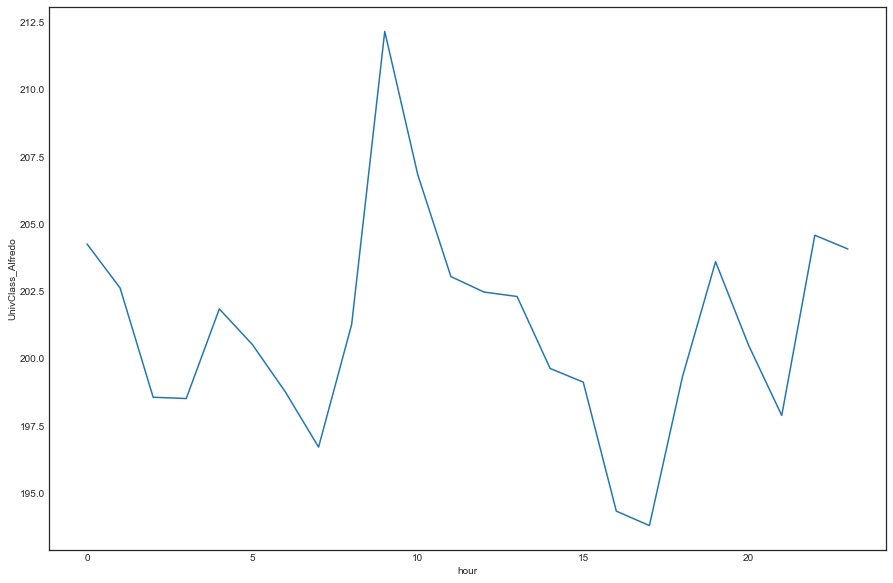

In [228]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_max, x="hour", y="UnivClass_Alfredo")

plt.show()

아침 8시부터 에너지 사용량이 증가해 아침 10시에 가장 에너지 사용량이 많고 오후 5시에 가장 적다.
이 원인으로는 온도가 유력해보이는데 온도를 그래프로 만들어서 확인해보자

<AxesSubplot:xlabel='hour', ylabel='TemperatureC'>

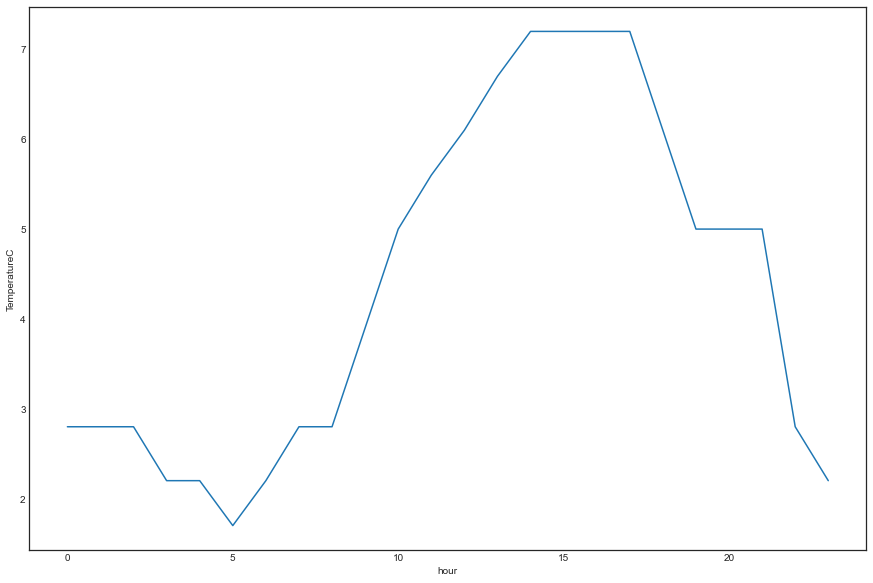

In [220]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_max, x="hour", y="TemperatureC")

두 그래프를 비교해보면오전 8시 이후부터 건물 내부 온도가 증가하는 것으로 보아 온도를 높이기 위해 에너지를 사용한 것으로 보인다.